## Importing Necessary Libraries.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

## Loading train dataset.

In [3]:
dataframe=pd.read_csv('train.csv')

## DataUnderstanding.

In [4]:
dataframe.keys()

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
data=dataframe
type(data)

pandas.core.frame.DataFrame

In [6]:
data.shape                                                  # 1460 rows and 81 columns

(1460, 81)

In [7]:
data.isnull().sum()                                         # Checking for the presence of null values.

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [8]:
[col for col in data.columns if data[col].isnull().any()]   # Displaying all columns with null values

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [9]:
null_values = data.isnull().sum()                                     # All null values columns in descending order
null_values = null_values[null_values>0]
print('all null:\n')
print(null_values.sort_values(ascending=False))

all null:

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64


In [10]:
data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [11]:
data.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         663
Length: 81, dtype: int64

In [12]:
data.shape

(1460, 81)

In [13]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Loading test data

In [15]:
test_df=pd.read_csv('test.csv')

In [16]:
# Observing the test data set.
test_df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
6,1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
7,1468,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
8,1469,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
9,1470,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,4,2010,WD,Normal


In [17]:
test_df.shape

(1459, 80)

In [18]:
test_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [19]:
test_df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [20]:
[col for col in test_df.columns if test_df[col].isnull().any()]   # Displaying all columns with null values

['MSZoning',
 'LotFrontage',
 'Alley',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType']

In [21]:
null_values = test_df.isnull().sum()                                     # All null values columns in descending order
null_values = null_values[null_values>0]
print('all null:\n')
print(null_values.sort_values(ascending=False))

all null:

PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
FireplaceQu      730
LotFrontage      227
GarageYrBlt       78
GarageCond        78
GarageQual        78
GarageFinish      78
GarageType        76
BsmtCond          45
BsmtExposure      44
BsmtQual          44
BsmtFinType1      42
BsmtFinType2      42
MasVnrType        16
MasVnrArea        15
MSZoning           4
BsmtFullBath       2
BsmtHalfBath       2
Utilities          2
Functional         2
Exterior2nd        1
Exterior1st        1
SaleType           1
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
KitchenQual        1
GarageCars         1
GarageArea         1
TotalBsmtSF        1
dtype: int64


## Checking for Outliers.

<AxesSubplot:xlabel='GrLivArea'>

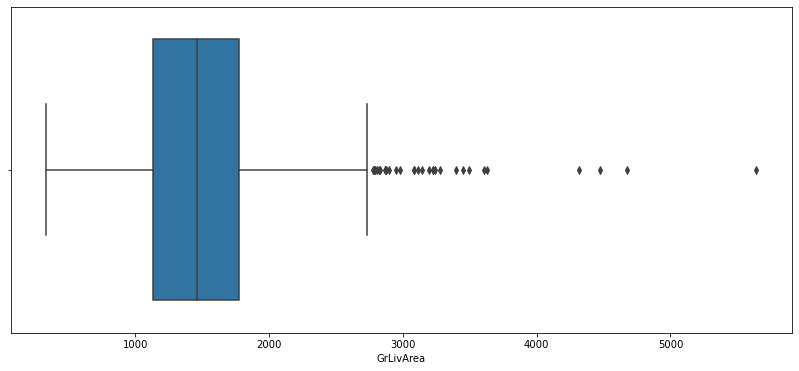

In [22]:
plt.figure(figsize=(14, 6))                                                      
sns.boxplot(x='GrLivArea',data=data)            

<AxesSubplot:xlabel='GarageArea'>

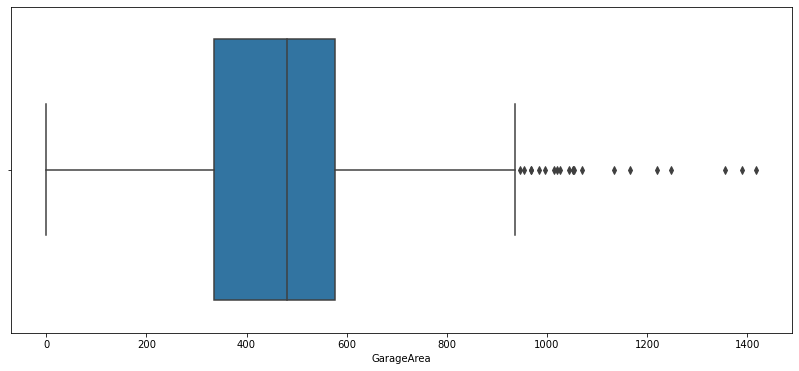

In [23]:
plt.figure(figsize=(14, 6))                                                
sns.boxplot(x='GarageArea',data=data)

<AxesSubplot:xlabel='1stFlrSF'>

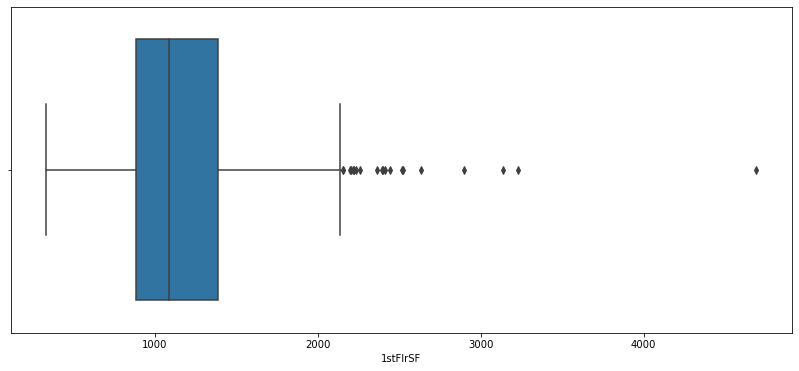

In [24]:
plt.figure(figsize=(14, 6))                                                     
sns.boxplot(x='1stFlrSF',data=data)

<AxesSubplot:xlabel='BsmtFinSF1'>

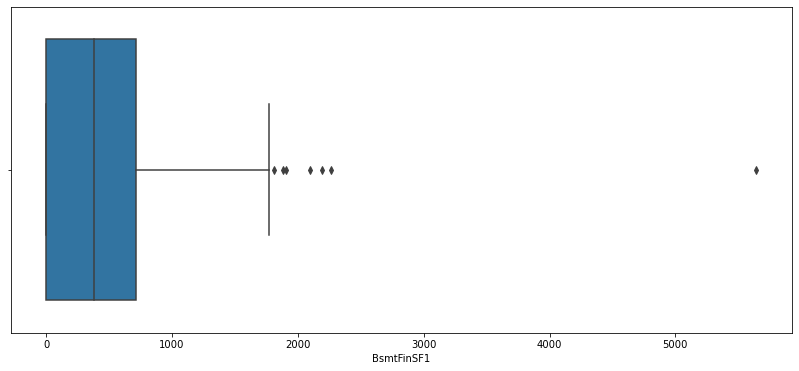

In [25]:
plt.figure(figsize=(14, 6))                                                       
sns.boxplot(x='BsmtFinSF1',data=data)

<AxesSubplot:xlabel='LotArea'>

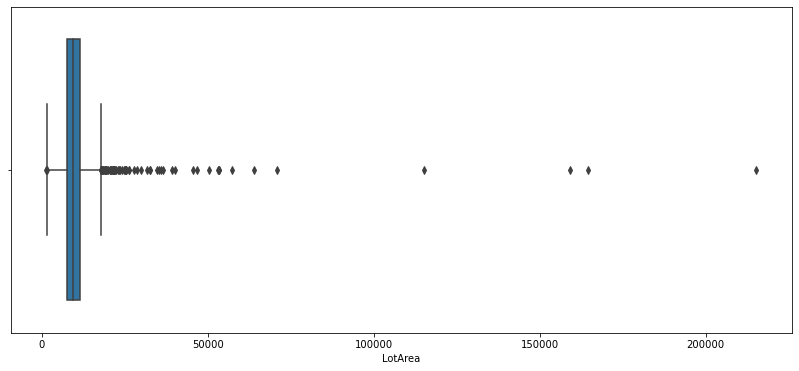

In [26]:
plt.figure(figsize=(14, 6))                                                       
sns.boxplot(x='LotArea',data=data)

### Outlier Treatment

In [27]:
data = data[(data['GrLivArea']<3500)]
data = data[(data['GarageArea']<1100)]
data = data[(data['1stFlrSF']<3000)]
data = data[(data['BsmtFinSF1']<2300)]
data = data[(data['LotArea']<100000)]

### test dataset columns have new values compared to train dataset

In [28]:
data['BedroomAbvGr'].value_counts()          # BedroomAbvGr #TotRmsAbvGrd #Utilities #KitchenAbvGr 

3    798
2    355
4    207
1     48
5     21
6      7
0      6
8      1
Name: BedroomAbvGr, dtype: int64

In [29]:
test_df['BedroomAbvGr'].value_counts()

3    792
2    384
4    187
1     53
5     27
6     14
0      2
Name: BedroomAbvGr, dtype: int64

In [30]:
final_df=pd.concat([data,test_df],axis=0)

In [31]:
final_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN


In [32]:
final_df.shape

(2902, 81)

In [33]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2902 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2902 non-null   int64  
 1   MSSubClass     2902 non-null   int64  
 2   MSZoning       2898 non-null   object 
 3   LotFrontage    2421 non-null   float64
 4   LotArea        2902 non-null   int64  
 5   Street         2902 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2902 non-null   object 
 8   LandContour    2902 non-null   object 
 9   Utilities      2900 non-null   object 
 10  LotConfig      2902 non-null   object 
 11  LandSlope      2902 non-null   object 
 12  Neighborhood   2902 non-null   object 
 13  Condition1     2902 non-null   object 
 14  Condition2     2902 non-null   object 
 15  BldgType       2902 non-null   object 
 16  HouseStyle     2902 non-null   object 
 17  OverallQual    2902 non-null   int64  
 18  OverallC

In [34]:
print(final_df.columns.tolist())

['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC'

## Data cleaning and Imputation.

In [35]:
# Imputing columns using statistics.
# Finding the dtypes of the columns.

In [36]:
# Dropping Unnecessary columns
final_df.drop(['Id'],axis=1,inplace=True)

In [37]:
# Dropping columns with more than 50% missing data.
final_df.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],axis=1,inplace=True)

In [38]:
final_df["LotFrontage"]=final_df["LotFrontage"].fillna(final_df["LotFrontage"].mode()[0])
final_df["GarageYrBlt"]=final_df["GarageYrBlt"].fillna(final_df["GarageYrBlt"].mode()[0])          
final_df["GarageType"]=final_df["GarageType"].fillna(final_df["GarageType"].mode()[0])    # Mode has been used to impute the categorical data
final_df["GarageFinish"]=final_df["GarageFinish"].fillna(final_df["GarageFinish"].mode()[0])
final_df["GarageQual"]=final_df["GarageQual"].fillna(final_df["GarageQual"].mode()[0])
final_df["GarageCond"]=final_df["GarageCond"].fillna(final_df["GarageCond"].mode()[0])
final_df["BsmtFinType2"]=final_df["BsmtFinType2"].fillna(final_df["BsmtFinType2"].mode()[0])
final_df["BsmtExposure"]=final_df["BsmtExposure"].fillna(final_df["BsmtExposure"].mode()[0])
final_df["BsmtFinType1"]=final_df["BsmtFinType1"].fillna(final_df["BsmtFinType1"].mode()[0])
final_df["BsmtCond"]=final_df["BsmtCond"].fillna(final_df["BsmtCond"].mode()[0])
final_df["BsmtQual"]=final_df["BsmtQual"].fillna(final_df["BsmtQual"].mode()[0])
final_df["MasVnrType"]=final_df["MasVnrType"].fillna(final_df["MasVnrType"].mode()[0])
final_df["Electrical"]=final_df["Electrical"].fillna(final_df["Electrical"].mode()[0])
final_df["MSZoning"]=final_df["MSZoning"].fillna(final_df["MSZoning"].mode()[0])
final_df["Utilities"]=final_df["Utilities"].fillna(final_df["Utilities"].mode()[0])
final_df["Exterior1st"]=final_df["Exterior1st"].fillna(final_df["Exterior1st"].mode()[0])
final_df["Exterior2nd"]=final_df["Exterior2nd"].fillna(final_df["Exterior2nd"].mode()[0])
final_df["KitchenQual"]=final_df["KitchenQual"].fillna(final_df["KitchenQual"].mode()[0])
final_df["Functional"]=final_df["Functional"].fillna(final_df["Functional"].mode()[0])
final_df["SaleType"]=final_df["SaleType"].fillna(final_df["SaleType"].mode()[0])
final_df["GarageCars"]=final_df["GarageCars"].fillna(final_df["GarageCars"].mode()[0])

In [39]:
final_df["BsmtFinSF1"]=final_df["BsmtFinSF1"].fillna(final_df["BsmtFinSF1"].mean())
final_df["BsmtFinSF2"]=final_df["BsmtFinSF2"].fillna(final_df["BsmtFinSF2"].mean())                                                            
final_df["BsmtUnfSF"]=final_df["BsmtUnfSF"].fillna(final_df["BsmtUnfSF"].mean())        
final_df["TotalBsmtSF"]=final_df["TotalBsmtSF"].fillna(final_df["TotalBsmtSF"].mean()) 
final_df["BsmtFullBath"]=final_df["BsmtFullBath"].fillna(final_df["BsmtFullBath"].mean())
final_df["BsmtHalfBath"]=final_df["BsmtHalfBath"].fillna(final_df["BsmtHalfBath"].mean())
final_df["GarageArea"]=final_df["GarageArea"].fillna(final_df["GarageArea"].mean())
final_df["MasVnrArea"]=final_df["MasVnrArea"].fillna(final_df["MasVnrArea"].mean())    # Mean used to impute MasVnArea(numeric) column

In [40]:
data.shape

(1443, 81)

In [41]:
test_df.shape

(1459, 80)

In [42]:
final_df.shape         

(2902, 75)

## Label encoding catergorical columns.

In [43]:
cat_cols=['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','SaleType','SaleCondition']
le=LabelEncoder()
for i in cat_cols:
    final_df[i]=le.fit_transform(final_df[i])
final_df.dtypes

MSSubClass         int64
MSZoning           int32
LotFrontage      float64
LotArea            int64
Street             int32
                  ...   
MoSold             int64
YrSold             int64
SaleType           int32
SaleCondition      int32
SalePrice        float64
Length: 75, dtype: object

In [44]:
final_df['SalePrice']

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1454         NaN
1455         NaN
1456         NaN
1457         NaN
1458         NaN
Name: SalePrice, Length: 2902, dtype: float64

In [45]:
df_Train=final_df.iloc[:1443,:]
df_Test=final_df.iloc[1460:,:]

In [46]:
df_Train.shape

(1443, 75)

In [47]:
df_Train['SalePrice'].isnull().sum()

0

In [48]:
df_Test.shape

(1442, 75)

In [49]:
df_Train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1443 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1443 non-null   int64  
 1   MSZoning       1443 non-null   int32  
 2   LotFrontage    1443 non-null   float64
 3   LotArea        1443 non-null   int64  
 4   Street         1443 non-null   int32  
 5   LotShape       1443 non-null   int32  
 6   LandContour    1443 non-null   int32  
 7   Utilities      1443 non-null   int32  
 8   LotConfig      1443 non-null   int32  
 9   LandSlope      1443 non-null   int32  
 10  Neighborhood   1443 non-null   int32  
 11  Condition1     1443 non-null   int32  
 12  Condition2     1443 non-null   int32  
 13  BldgType       1443 non-null   int32  
 14  HouseStyle     1443 non-null   int32  
 15  OverallQual    1443 non-null   int64  
 16  OverallCond    1443 non-null   int64  
 17  YearBuilt      1443 non-null   int64  
 18  YearRemo

## Distribution plot.

C:\Users\Rahul\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Rahul\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Rahul\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

C:\Users\Rahul\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Rahul\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Rahul\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

C:\Users\Rahul\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Rahul\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Rahul\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

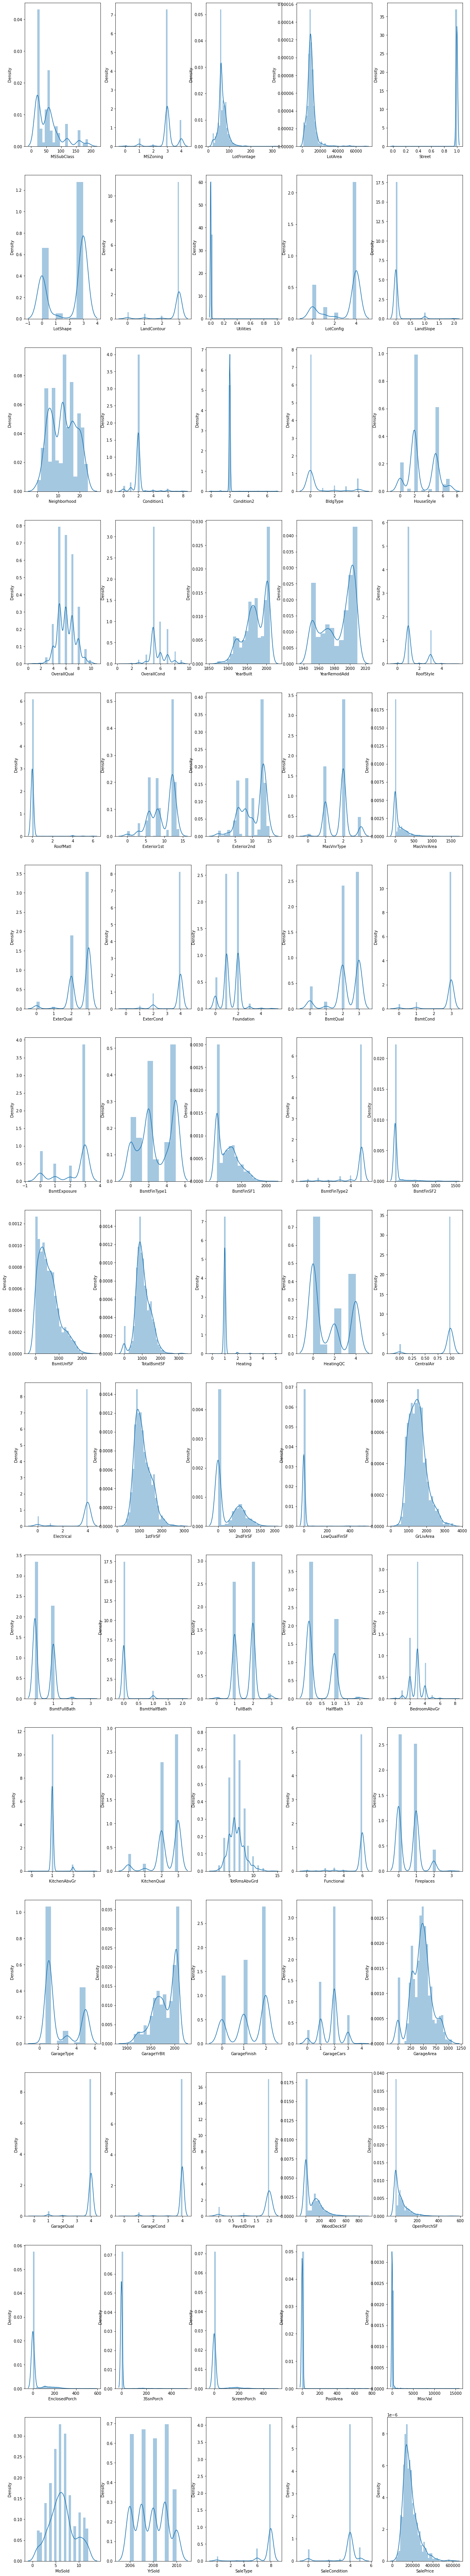

In [50]:
rows=15
cols=5
fig, ax=plt.subplots(nrows=rows,ncols=cols,figsize=(20,120))
col=df_Train.columns
index=0
for i in range(rows):
    for j in range(cols):
        sns.distplot(df_Train[col[index]],ax=ax[i][j])
        index=index+1
        
plt.show()

In [51]:
df_Train['SalePrice']=np.log(df_Train.SalePrice)               # Log Transformation.

<ipython-input-51-579e36a2cc7b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Train['SalePrice']=np.log(df_Train.SalePrice)               # Log Transformation.


[]

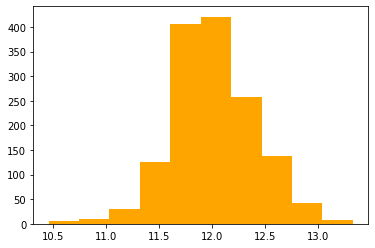

In [52]:
plt.hist(df_Train['SalePrice'],color='orange')
plt.plot()

In [53]:
df_Test['SalePrice']

17     NaN
18     NaN
19     NaN
20     NaN
21     NaN
        ..
1454   NaN
1455   NaN
1456   NaN
1457   NaN
1458   NaN
Name: SalePrice, Length: 1442, dtype: float64

In [54]:
df_Test.drop(['SalePrice'],axis=1,inplace=True)

C:\Users\Rahul\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


## DataVisualization.

In [55]:
#sns.pairplot(df_Train)

## Printing top 5 and last 5 highly correlated variables.

In [56]:
corr=df_Train.corr()
print(corr['SalePrice'].sort_values(ascending=False)[:5])                   
print(corr['SalePrice'].sort_values(ascending=False)[-5:])

SalePrice      1.000000
OverallQual    0.817487
GrLivArea      0.711126
GarageCars     0.684027
GarageArea     0.664392
Name: SalePrice, dtype: float64
HeatingQC      -0.427146
KitchenQual    -0.524856
BsmtQual       -0.572239
GarageFinish   -0.576765
ExterQual      -0.588600
Name: SalePrice, dtype: float64


In [57]:
mycorr=df_Train[["SalePrice", "OverallQual", "GrLivArea", "GarageCars", "GarageArea"]]

In [58]:
mycorr

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea
0,12.247694,7,1710,2.0,548.0
1,12.109011,6,1262,2.0,460.0
2,12.317167,7,1786,2.0,608.0
3,11.849398,7,1717,3.0,642.0
4,12.429216,8,2198,3.0,836.0
...,...,...,...,...,...
1455,12.072541,6,1647,2.0,460.0
1456,12.254863,6,2073,2.0,500.0
1457,12.493130,7,2340,1.0,252.0
1458,11.864462,5,1078,1.0,240.0


In [59]:
X2=mycorr.drop(labels=['SalePrice'],axis=1)                         #GrLivArea' 'OverallQual' 'SalePrice
Y2=mycorr['SalePrice']
X2.head()

,OverallQual,GrLivArea,GarageCars,GarageArea
0,7,1710,2.0,548.0
1,6,1262,2.0,460.0
2,7,1786,2.0,608.0
3,7,1717,3.0,642.0
4,8,2198,3.0,836.0


In [60]:
X2_train,X2_test,Y2_train,Y2_test=train_test_split(X2,Y2,test_size=0.2,random_state=0)
print(X2_train.shape,X2_test.shape,Y2_train.shape,Y2_test.shape)

(1154, 4) (289, 4) (1154,) (289,)


In [61]:
scaled=StandardScaler()
X2_train=scaled.fit_transform(X2_train)
X2_test=scaled.transform(X2_test)

In [62]:
model2=LinearRegression()
model2.fit(X2_train,Y2_train)

LinearRegression()

In [63]:
Y2_predict=model2.predict(X2_test)

In [64]:
score=r2_score(Y2_test,Y2_predict)
mae=mean_absolute_error(Y2_test,Y2_predict)
mse=mean_squared_error(Y2_test,Y2_predict)
rmse=(np.sqrt(mean_squared_error(Y2_test,Y2_predict)))
print('r2_score: ',score)
print('mean_absolute_error: ',mae)
print('mean_squared_error: ',mse)
print('root_mean_squared_error: ',rmse)

r2_score:  0.8177006510050061
mean_absolute_error:  0.12207543874956446
mean_squared_error:  0.025956050547718334
root_mean_squared_error:  0.1611088158597112


In [65]:
from sklearn.tree import DecisionTreeRegressor

In [66]:
DT2=DecisionTreeRegressor()
DT2.fit(X2_train,Y2_train)

DecisionTreeRegressor()

In [67]:
test_preds2=DT2.predict(X2_test)

In [68]:
score=r2_score(Y2_test,test_preds2)
mae=mean_absolute_error(Y2_test,test_preds2)
mse=mean_squared_error(Y2_test,test_preds2)
rmse=(np.sqrt(mean_squared_error(Y2_test,test_preds2)))
print('r2_score: ',score)
print('mean_absolute_error: ',mae)
print('mean_squared_error: ',mse)
print('root_mean_squared_error: ',rmse)

r2_score:  0.5771694448420388
mean_absolute_error:  0.179213365352755
mean_squared_error:  0.06020323892161143
root_mean_squared_error:  0.2453634832684184


In [69]:
from sklearn.ensemble import RandomForestRegressor

In [70]:
RF2=RandomForestRegressor().fit(X2_train,Y2_train)

In [71]:
test_preds3=RF2.predict(X2_test)

In [72]:
score=r2_score(Y2_test,test_preds3)
mae=mean_absolute_error(Y2_test,test_preds3)
mse=mean_squared_error(Y2_test,test_preds3)
rmse=(np.sqrt(mean_squared_error(Y2_test,test_preds3)))
print('r2_score: ',score)
print('mean_absolute_error: ',mae)
print('mean_squared_error: ',mse)
print('root_mean_squared_error: ',rmse)

r2_score:  0.8062080133666585
mean_absolute_error:  0.12268054764109261
mean_squared_error:  0.027592389268136657
root_mean_squared_error:  0.16610957006788218


## Finding correlation using correlation matrix.

In [73]:
corrmat=df_Train.corr()
corrmat

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
MSSubClass,1.000000,0.033969,-0.371510,-0.298326,0.002366,0.121642,0.004229,-0.023045,0.079464,-0.043177,...,-0.009295,-0.044205,-0.028919,0.008024,-0.010215,-0.013231,-0.019953,0.008184,-0.023062,-0.071930
MSZoning,0.033969,1.000000,-0.100956,-0.058417,0.044398,0.065712,-0.022742,-0.001275,-0.009030,-0.023540,...,0.116555,0.000045,0.010907,-0.002826,0.012973,-0.029919,-0.019101,0.088684,0.010282,-0.204267
LotFrontage,-0.371510,-0.100956,1.000000,0.373442,-0.022370,-0.085980,-0.044435,-0.009779,-0.140406,0.046353,...,0.024436,0.064252,0.040594,0.061362,-0.012549,0.025389,0.004176,-0.024373,0.061756,0.328942
LotArea,-0.298326,-0.058417,0.373442,1.000000,-0.060244,-0.251806,-0.123757,0.021853,-0.149920,0.282308,...,0.001586,0.050782,0.099265,0.068407,0.032181,0.013075,-0.021038,0.011908,0.032423,0.349929
Street,0.002366,0.044398,-0.022370,-0.060244,1.000000,-0.020532,0.096592,0.001388,0.000949,-0.142179,...,0.019023,0.006170,-0.048631,0.003078,0.003099,0.021063,-0.026925,-0.016332,0.012778,0.057576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MoSold,-0.013231,-0.029919,0.025389,0.013075,0.021063,-0.034569,-0.012470,-0.051926,0.013493,0.008928,...,-0.028714,0.029302,0.023588,-0.023035,-0.007798,1.000000,-0.150216,-0.047240,0.015895,0.067455
YrSold,-0.019953,-0.019101,0.004176,-0.021038,-0.026925,0.031964,0.020069,0.023345,-0.009485,-0.000572,...,-0.009290,0.018297,0.016997,-0.062989,0.004807,-0.150216,1.000000,-0.000860,0.003085,-0.028593
SaleType,0.008184,0.088684,-0.024373,0.011908,-0.016332,0.001057,-0.031884,-0.127537,0.015506,0.051119,...,-0.019385,-0.009538,0.001964,0.018084,0.017283,-0.047240,-0.000860,1.000000,0.191594,-0.040655
SaleCondition,-0.023062,0.010282,0.061756,0.032423,0.012778,-0.039537,0.041499,-0.090214,0.050575,-0.051127,...,-0.099142,0.004845,-0.020664,-0.050117,0.012942,0.015895,0.003085,0.191594,1.000000,0.257979


## Plotting the correlation matrix into a heatmap.

In [74]:
#fig, ax=plt.subplots(figsize=(18,10))
#ax =sns.heatmap(corrmat, annot=True,annot_kws={'size': 14}) 
#bottom, top = ax.get_ylim()
#ax.set_ylim(bottom + 0.5, top - 0.5)

In [75]:
corrmat.index.values

array(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenP

In [76]:
def getCorrelatedFeature(corrdata, threshold):
    feature=[]
    value=[]

    for i, index in enumerate(corrmat.index):
        if abs(corrdata[index])> threshold:
            feature.append(index)
            value.append(corrdata[index])
        
    df1=pd.DataFrame(data=value,index=feature,columns=['Corr Value'])
    return df1

In [77]:
threshold=0.50
Corr_Value=getCorrelatedFeature(corrmat['SalePrice'],threshold)
Corr_Value

,Corr Value
OverallQual,0.817487
YearBuilt,0.597911
YearRemodAdd,0.571290
ExterQual,-0.588600
BsmtQual,-0.572239
TotalBsmtSF,0.632820
1stFlrSF,0.602947
GrLivArea,0.711126
FullBath,0.588720
KitchenQual,-0.524856


In [78]:
Corr_Value.index.values

array(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'ExterQual',
       'BsmtQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath',
       'KitchenQual', 'TotRmsAbvGrd', 'GarageFinish', 'GarageCars',
       'GarageArea', 'SalePrice'], dtype=object)

In [79]:
correlated_data=df_Train[Corr_Value.index]

In [80]:
correlated_data

,OverallQual,YearBuilt,YearRemodAdd,ExterQual,BsmtQual,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,KitchenQual,TotRmsAbvGrd,GarageFinish,GarageCars,GarageArea,SalePrice
0,7,2003,2003,2,2,856.0,856,1710,2,2,8,1,2.0,548.0,12.247694
1,6,1976,1976,3,2,1262.0,1262,1262,2,3,6,1,2.0,460.0,12.109011
2,7,2001,2002,2,2,920.0,920,1786,2,2,6,1,2.0,608.0,12.317167
3,7,1915,1970,3,3,756.0,961,1717,1,2,7,2,3.0,642.0,11.849398
4,8,2000,2000,2,2,1145.0,1145,2198,2,2,9,1,3.0,836.0,12.429216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1999,2000,3,2,953.0,953,1647,2,3,7,1,2.0,460.0,12.072541
1456,6,1978,1988,3,2,1542.0,2073,2073,2,3,7,2,2.0,500.0,12.254863
1457,7,1941,2006,0,3,1152.0,1188,2340,2,2,9,1,1.0,252.0,12.493130
1458,5,1950,1996,3,3,1078.0,1078,1078,1,2,5,2,1.0,240.0,11.864462


## Pair Plotting this Correlated data.

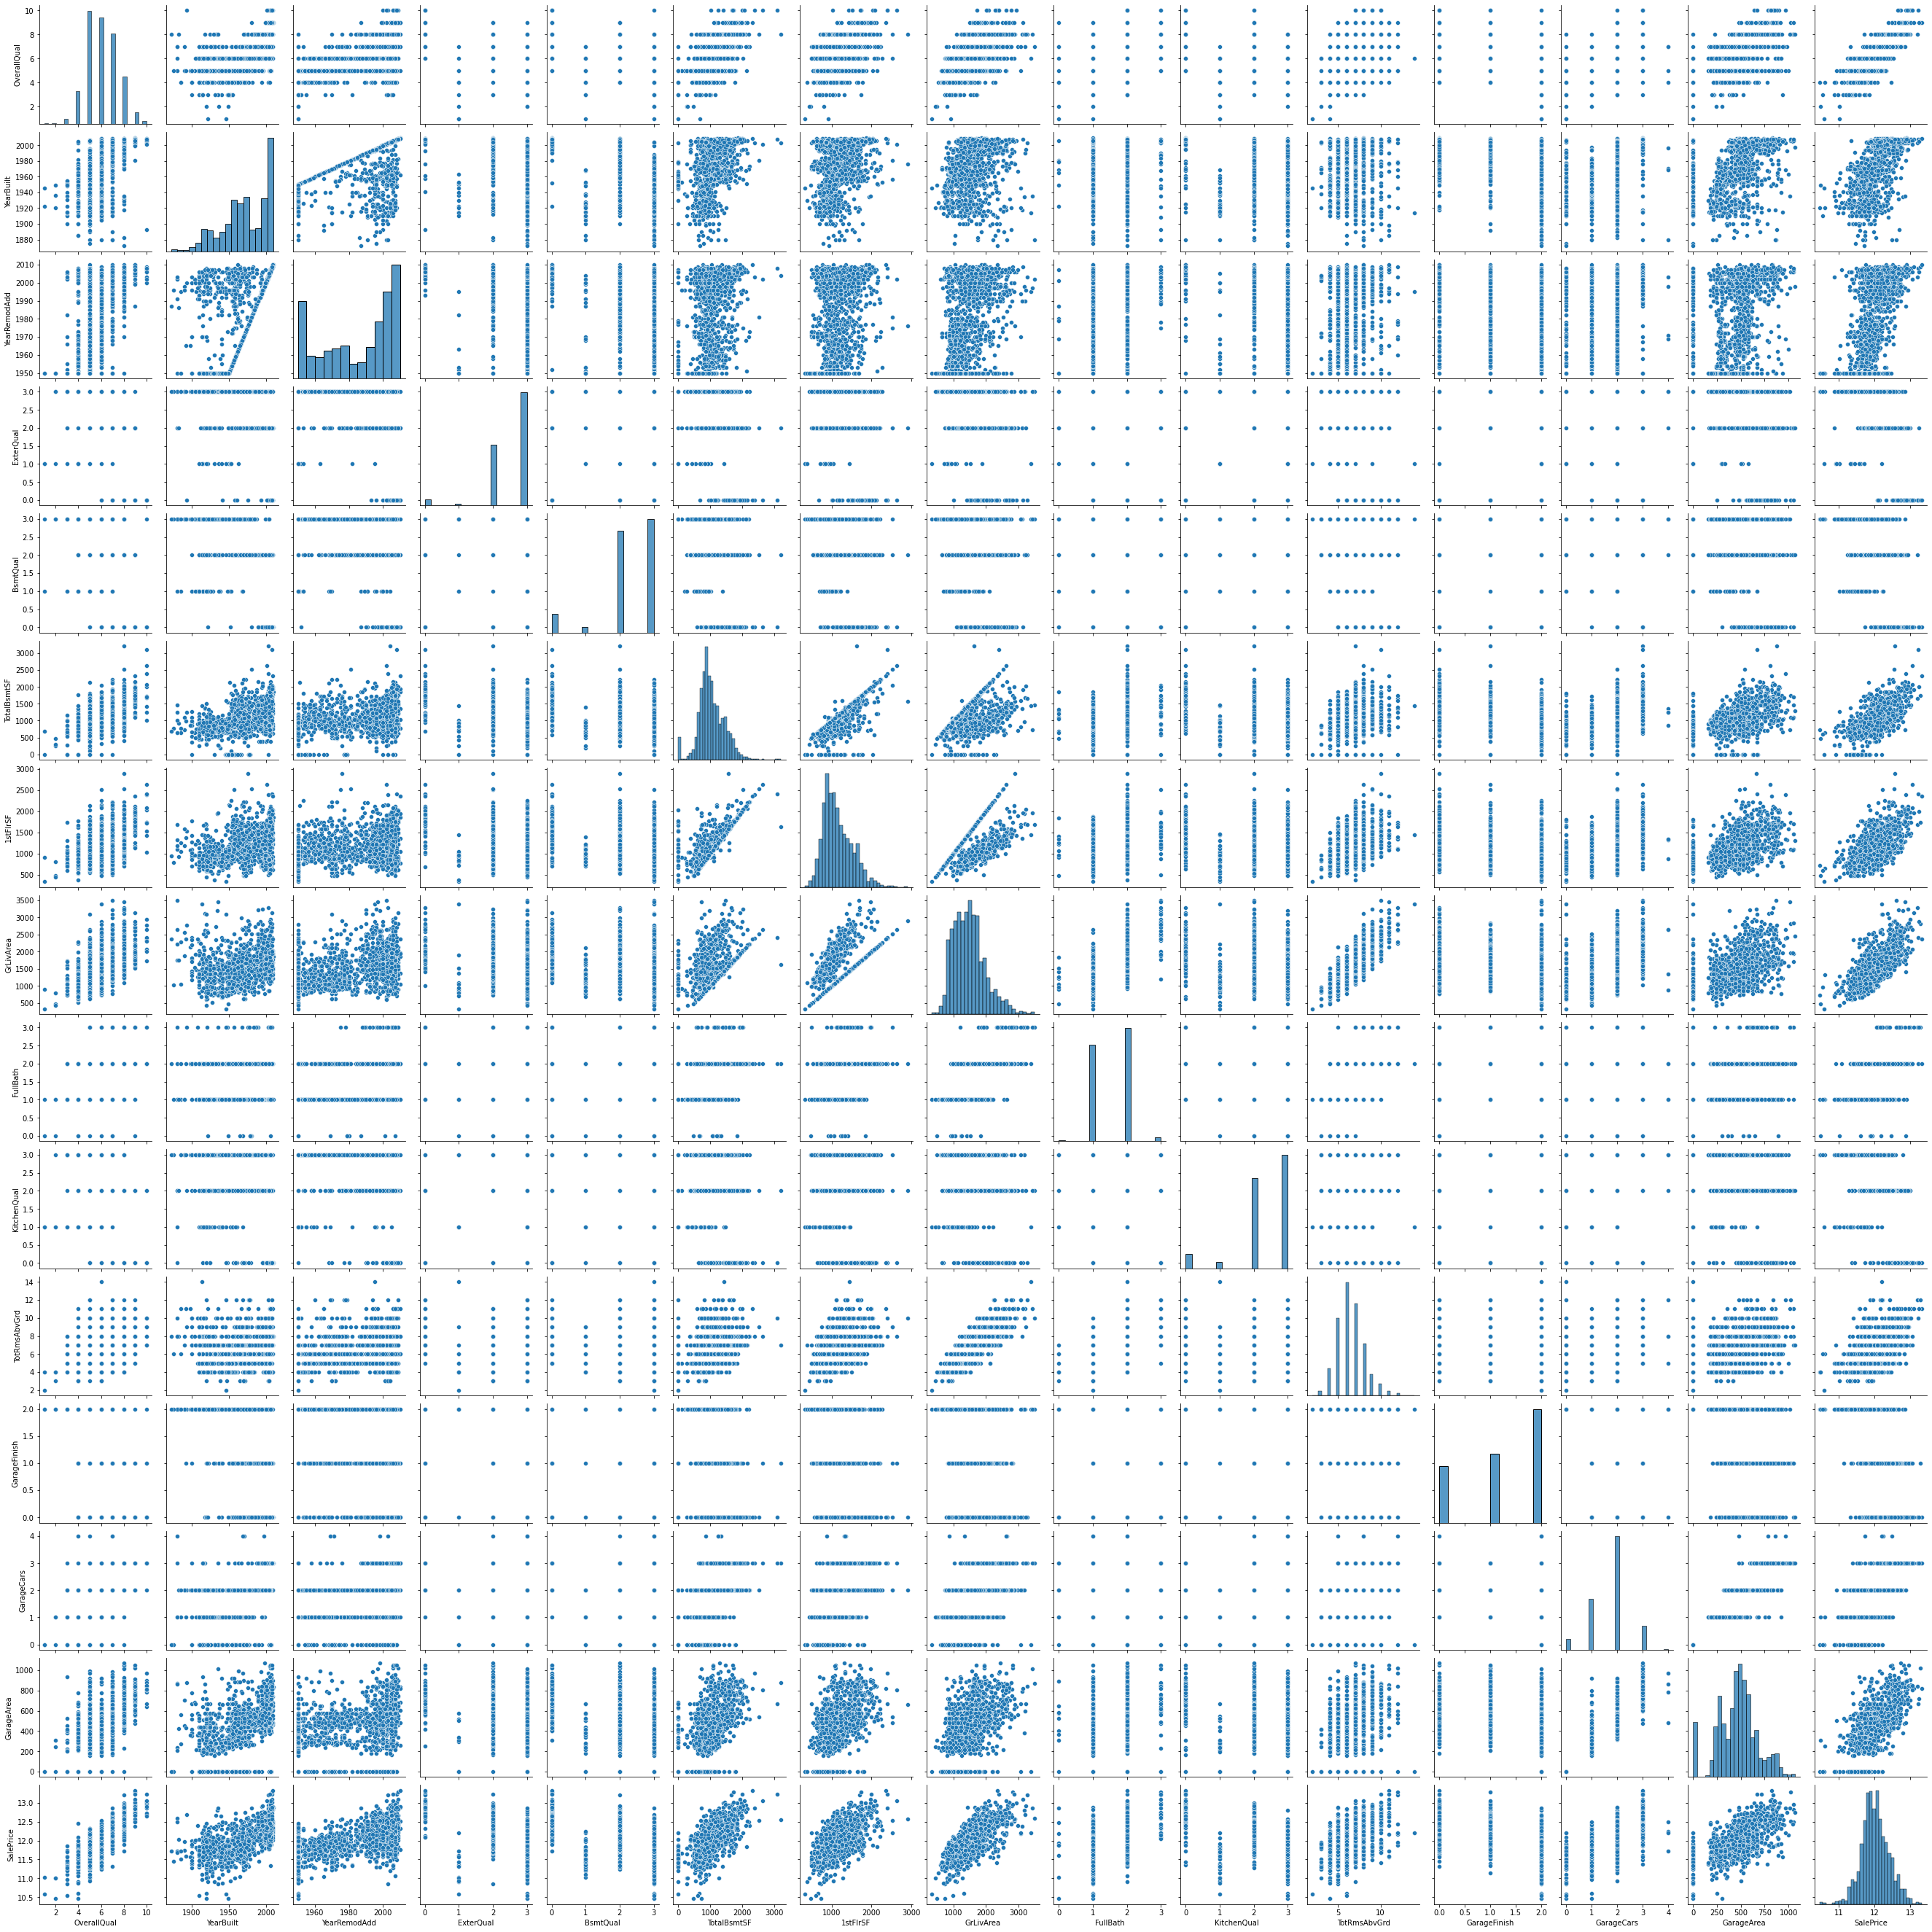

In [81]:
sns.pairplot(data=correlated_data)

## Heat Map of this Correlated data.

(15.5, -0.5)

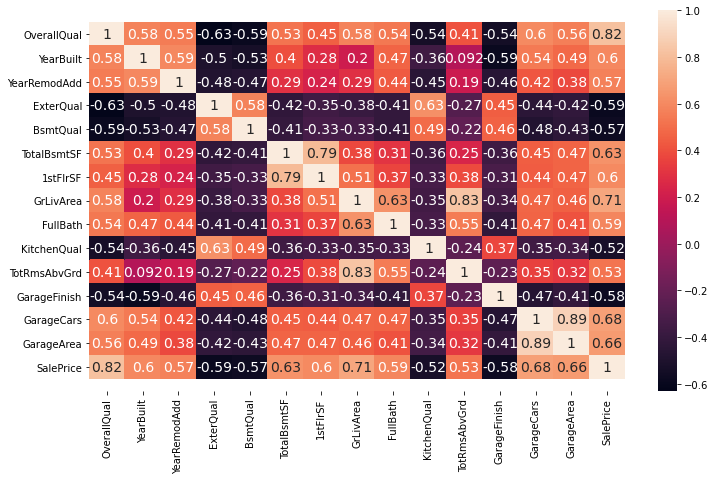

In [82]:
fig, ax=plt.subplots(figsize=(12,7))
ax =sns.heatmap(correlated_data.corr(), annot=True,annot_kws={'size': 14}) 
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

## Split dataset. 

In [83]:
X=correlated_data.drop(labels=['SalePrice'],axis=1)
Y=correlated_data['SalePrice']
X.head()

,OverallQual,YearBuilt,YearRemodAdd,ExterQual,BsmtQual,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,KitchenQual,TotRmsAbvGrd,GarageFinish,GarageCars,GarageArea
0,7,2003,2003,2,2,856.0,856,1710,2,2,8,1,2.0,548.0
1,6,1976,1976,3,2,1262.0,1262,1262,2,3,6,1,2.0,460.0
2,7,2001,2002,2,2,920.0,920,1786,2,2,6,1,2.0,608.0
3,7,1915,1970,3,3,756.0,961,1717,1,2,7,2,3.0,642.0
4,8,2000,2000,2,2,1145.0,1145,2198,2,2,9,1,3.0,836.0


In [84]:
Y.head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64

In [85]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(1154, 14) (289, 14) (1154,) (289,)


## Training the model.

In [86]:
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [87]:
Y_predict=model.predict(X_test)

In [88]:
Y_predict

array([12.15589317, 12.0613562 , 12.06502887, 12.71466216, 12.08582479,
       11.57625946, 11.44390009, 12.1116171 , 12.04802195, 12.21474717,
       11.66341684, 12.54133989, 12.18497576, 11.60513119, 11.83395923,
       11.80436472, 11.64379303, 11.75832531, 11.71845181, 11.73890632,
       12.55749965, 11.70201705, 11.97367198, 11.72589041, 11.4869634 ,
       12.12004148, 11.88096111, 12.44770183, 12.13962033, 11.7089884 ,
       12.64509254, 11.42493213, 11.31264538, 11.78037207, 12.09045364,
       12.26330642, 11.67381522, 12.63094138, 12.44891566, 12.08623538,
       12.36502263, 12.29053912, 12.53949738, 11.75942207, 12.55150513,
       11.81083962, 12.07310004, 11.68321231, 12.36821085, 12.01761669,
       11.61485162, 11.90441011, 12.53783511, 12.18796894, 11.75353835,
       12.68776236, 12.04261758, 11.6288974 , 11.71060394, 12.03683529,
       11.55760411, 12.47565178, 12.08810495, 12.73568677, 11.83070398,
       12.01092553, 11.79473994, 11.60087397, 12.12605883, 11.84

In [89]:
Y_predict,Y_test

(array([12.15589317, 12.0613562 , 12.06502887, 12.71466216, 12.08582479,
        11.57625946, 11.44390009, 12.1116171 , 12.04802195, 12.21474717,
        11.66341684, 12.54133989, 12.18497576, 11.60513119, 11.83395923,
        11.80436472, 11.64379303, 11.75832531, 11.71845181, 11.73890632,
        12.55749965, 11.70201705, 11.97367198, 11.72589041, 11.4869634 ,
        12.12004148, 11.88096111, 12.44770183, 12.13962033, 11.7089884 ,
        12.64509254, 11.42493213, 11.31264538, 11.78037207, 12.09045364,
        12.26330642, 11.67381522, 12.63094138, 12.44891566, 12.08623538,
        12.36502263, 12.29053912, 12.53949738, 11.75942207, 12.55150513,
        11.81083962, 12.07310004, 11.68321231, 12.36821085, 12.01761669,
        11.61485162, 11.90441011, 12.53783511, 12.18796894, 11.75353835,
        12.68776236, 12.04261758, 11.6288974 , 11.71060394, 12.03683529,
        11.55760411, 12.47565178, 12.08810495, 12.73568677, 11.83070398,
        12.01092553, 11.79473994, 11.60087397, 12.1

In [90]:
df=pd.DataFrame(data=[Y_predict,Y_test])

In [91]:
df.T                                               ## Above 0 means Predicted Value and 1 is True Value. ##

,0,1
0,12.155893,12.230765
1,12.061356,11.951180
2,12.065029,12.061047
3,12.714662,12.631014
4,12.085825,12.066236
...,...,...
284,12.117480,12.289954
285,12.073943,12.138864
286,10.871312,10.578980
287,11.910314,11.940393


## Evaluation metrics.

In [92]:
score=r2_score(Y_test,Y_predict)
mae=mean_absolute_error(Y_test,Y_predict)
mse=mean_squared_error(Y_test,Y_predict)
rmse=(np.sqrt(mean_squared_error(Y_test,Y_predict)))
print('r2_score: ',score)
print('mean_absolute_error: ',mae)
print('mean_squared_error: ',mse)
print('root_mean_squared_error: ',rmse)

r2_score:  0.8578340837206088
mean_absolute_error:  0.10780905203774119
mean_squared_error:  0.0202417931246255
root_mean_squared_error:  0.14227365576460563


## Store these features into pandas dataframe.

In [93]:
total_features=[]
total_features_name=[]
selected_correlation_value=[]
r2_scores=[]
mae_value=[]
mse_value=[]
rmse_value=[]

In [94]:
def performance_metrics(features, th, Y_test, Y_predict):
    score=r2_score(Y_test,Y_predict)
    mae=mean_absolute_error(Y_test,Y_predict)
    mse=mean_squared_error(Y_test,Y_predict)
    rmse=(np.sqrt(mean_squared_error(Y_test,Y_predict)))
     
    total_features.append(len(features)-1) 
    total_features_name.append(str(features))
    selected_correlation_value.append(th)
    r2_scores.append(score)
    mae_value.append(mae)
    mse_value.append(mse)
    rmse_value.append(rmse)
    
    metrics_dataframe=pd.DataFrame(data=[total_features_name,total_features,selected_correlation_value,r2_scores,mae_value,mse_value,rmse_value],
                                   index=['feature names','number of features','corr_value','r2_score','mae','mse','rmse'])   
    return metrics_dataframe.T

In [95]:
performance_metrics(correlated_data.columns.values,threshold,Y_test,Y_predict)

,feature names,number of features,corr_value,r2_score,mae,mse,rmse
0,['OverallQual' 'YearBuilt' 'YearRemodAdd' 'Ext...,14,0.5,0.857834,0.107809,0.0202418,0.142274


## Regression Plot of the features correlated with SalePrice.

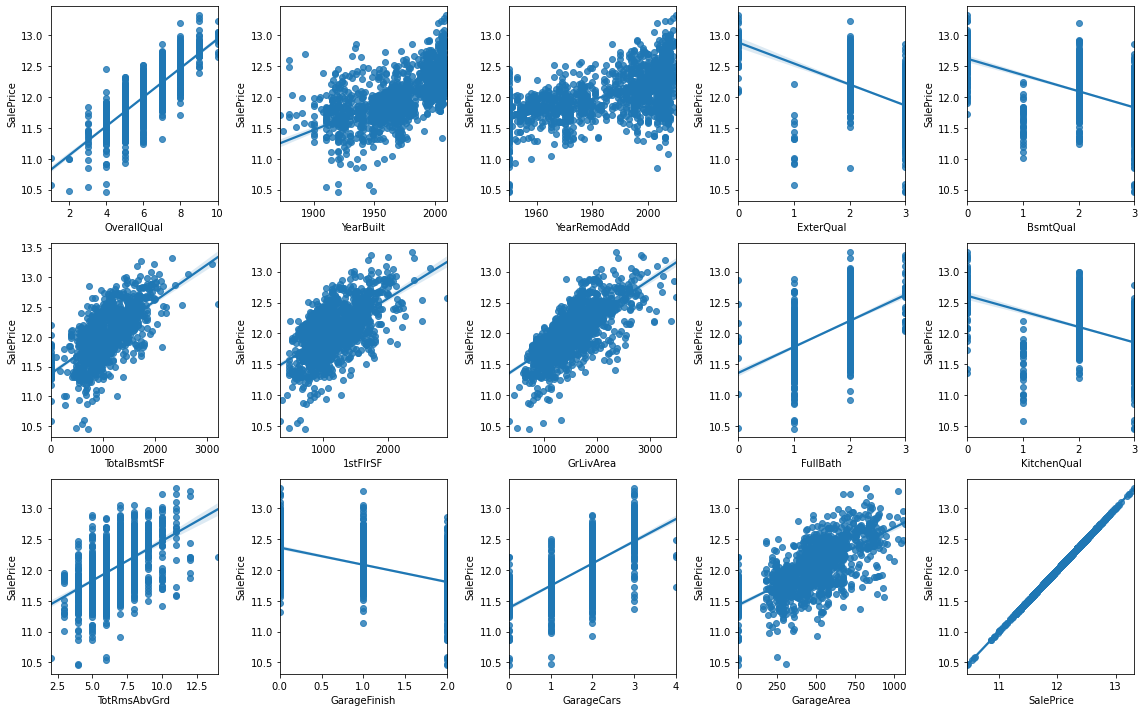

In [96]:
rows=3
cols=5
fig, ax=plt.subplots(nrows=rows,ncols=cols,figsize=(16,10))

col=correlated_data.columns
index=0

for i in range(rows):
    for j in range(cols):
        sns.regplot(x=correlated_data[col[index]],y=correlated_data['SalePrice'],ax=ax[i][j])
        index=index+1
fig.tight_layout()   

## Now lets find other combination of columns with threshold > 60%.

In [97]:
corrmat['SalePrice']

MSSubClass      -0.071930
MSZoning        -0.204267
LotFrontage      0.328942
LotArea          0.349929
Street           0.057576
                   ...   
MoSold           0.067455
YrSold          -0.028593
SaleType        -0.040655
SaleCondition    0.257979
SalePrice        1.000000
Name: SalePrice, Length: 75, dtype: float64

In [98]:
threshold=0.60
corr_value= getCorrelatedFeature(corrmat['SalePrice'],threshold)
corr_value

,Corr Value
OverallQual,0.817487
TotalBsmtSF,0.632820
1stFlrSF,0.602947
GrLivArea,0.711126
GarageCars,0.684027
GarageArea,0.664392
SalePrice,1.000000


In [99]:
correlated_data=df_Train[corr_value.index]
correlated_data

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,GarageCars,GarageArea,SalePrice
0,7,856.0,856,1710,2.0,548.0,12.247694
1,6,1262.0,1262,1262,2.0,460.0,12.109011
2,7,920.0,920,1786,2.0,608.0,12.317167
3,7,756.0,961,1717,3.0,642.0,11.849398
4,8,1145.0,1145,2198,3.0,836.0,12.429216
...,...,...,...,...,...,...,...
1455,6,953.0,953,1647,2.0,460.0,12.072541
1456,6,1542.0,2073,2073,2.0,500.0,12.254863
1457,7,1152.0,1188,2340,1.0,252.0,12.493130
1458,5,1078.0,1078,1078,1.0,240.0,11.864462


In [100]:
def get_y_predict(corr_data):
    X=corr_data.drop(labels=['SalePrice'],axis=1)
    Y=corr_data['SalePrice']
    
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)
    model=LinearRegression()
    model.fit(X_train,Y_train)
    Y_predict=model.predict(X_test)
    return Y_predict

In [101]:
Y_predict=get_y_predict(correlated_data)

In [102]:
performance_metrics(correlated_data.columns.values,threshold,Y_test,Y_predict)

,feature names,number of features,corr_value,r2_score,mae,mse,rmse
0,['OverallQual' 'YearBuilt' 'YearRemodAdd' 'Ext...,14,0.5,0.857834,0.107809,0.0202418,0.142274
1,['OverallQual' 'TotalBsmtSF' '1stFlrSF' 'GrLiv...,6,0.6,0.838433,0.115883,0.0230041,0.151671


## lets find other combinations of columns with threshold > 70%

In [103]:
corrmat['SalePrice']

MSSubClass      -0.071930
MSZoning        -0.204267
LotFrontage      0.328942
LotArea          0.349929
Street           0.057576
                   ...   
MoSold           0.067455
YrSold          -0.028593
SaleType        -0.040655
SaleCondition    0.257979
SalePrice        1.000000
Name: SalePrice, Length: 75, dtype: float64

In [104]:
threshold=0.70
corr_value= getCorrelatedFeature(corrmat['SalePrice'],threshold)
corr_value

,Corr Value
OverallQual,0.817487
GrLivArea,0.711126
SalePrice,1.000000


In [105]:
correlated_data=df_Train[corr_value.index]
correlated_data

,OverallQual,GrLivArea,SalePrice
0,7,1710,12.247694
1,6,1262,12.109011
2,7,1786,12.317167
3,7,1717,11.849398
4,8,2198,12.429216
...,...,...,...
1455,6,1647,12.072541
1456,6,2073,12.254863
1457,7,2340,12.493130
1458,5,1078,11.864462


In [106]:
Y_predict=get_y_predict(correlated_data)

In [107]:
performance_metrics(correlated_data.columns.values,threshold,Y_test,Y_predict)

,feature names,number of features,corr_value,r2_score,mae,mse,rmse
0,['OverallQual' 'YearBuilt' 'YearRemodAdd' 'Ext...,14,0.5,0.857834,0.107809,0.0202418,0.142274
1,['OverallQual' 'TotalBsmtSF' '1stFlrSF' 'GrLiv...,6,0.6,0.838433,0.115883,0.0230041,0.151671
2,['OverallQual' 'GrLivArea' 'SalePrice'],2,0.7,0.772234,0.139503,0.0324297,0.180082


## Now lets select only 'OverallQual' feature.

In [108]:
correlated_data=df_Train[['OverallQual','SalePrice']]
correlated_data

,OverallQual,SalePrice
0,7,12.247694
1,6,12.109011
2,7,12.317167
3,7,11.849398
4,8,12.429216
...,...,...
1455,6,12.072541
1456,6,12.254863
1457,7,12.493130
1458,5,11.864462


In [109]:
Y_predict=get_y_predict(correlated_data)

In [110]:
performance_metrics(correlated_data.columns.values,threshold,Y_test,Y_predict)

,feature names,number of features,corr_value,r2_score,mae,mse,rmse
0,['OverallQual' 'YearBuilt' 'YearRemodAdd' 'Ext...,14,0.5,0.857834,0.107809,0.0202418,0.142274
1,['OverallQual' 'TotalBsmtSF' '1stFlrSF' 'GrLiv...,6,0.6,0.838433,0.115883,0.0230041,0.151671
2,['OverallQual' 'GrLivArea' 'SalePrice'],2,0.7,0.772234,0.139503,0.0324297,0.180082
3,['OverallQual' 'SalePrice'],1,0.7,0.685833,0.163027,0.0447315,0.211498


# lets find other combinations of columns with accuracy > 40 %

In [111]:
threshold=0.40
corr_value= getCorrelatedFeature(corrmat['SalePrice'],threshold)
corr_value

,Corr Value
OverallQual,0.817487
YearBuilt,0.597911
YearRemodAdd,0.571290
MasVnrArea,0.419523
ExterQual,-0.588600
Foundation,0.418368
BsmtQual,-0.572239
TotalBsmtSF,0.632820
HeatingQC,-0.427146
1stFlrSF,0.602947


In [112]:
correlated_data=df_Train[corr_value.index]
correlated_data

,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,Foundation,BsmtQual,TotalBsmtSF,HeatingQC,1stFlrSF,GrLivArea,FullBath,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageFinish,GarageCars,GarageArea,SalePrice
0,7,2003,2003,196.0,2,2,2,856.0,0,856,1710,2,2,8,0,2003.0,1,2.0,548.0,12.247694
1,6,1976,1976,0.0,3,1,2,1262.0,0,1262,1262,2,3,6,1,1976.0,1,2.0,460.0,12.109011
2,7,2001,2002,162.0,2,2,2,920.0,0,920,1786,2,2,6,1,2001.0,1,2.0,608.0,12.317167
3,7,1915,1970,0.0,3,0,3,756.0,2,961,1717,1,2,7,1,1998.0,2,3.0,642.0,11.849398
4,8,2000,2000,350.0,2,2,2,1145.0,0,1145,2198,2,2,9,1,2000.0,1,3.0,836.0,12.429216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1999,2000,0.0,3,2,2,953.0,0,953,1647,2,3,7,1,1999.0,1,2.0,460.0,12.072541
1456,6,1978,1988,119.0,3,1,2,1542.0,4,2073,2073,2,3,7,2,1978.0,2,2.0,500.0,12.254863
1457,7,1941,2006,0.0,0,4,3,1152.0,0,1188,2340,2,2,9,2,1941.0,1,1.0,252.0,12.493130
1458,5,1950,1996,0.0,3,1,3,1078.0,2,1078,1078,1,2,5,0,1950.0,2,1.0,240.0,11.864462


In [113]:
performance_metrics(correlated_data.columns.values,threshold,Y_test,Y_predict)

,feature names,number of features,corr_value,r2_score,mae,mse,rmse
0,['OverallQual' 'YearBuilt' 'YearRemodAdd' 'Ext...,14,0.5,0.857834,0.107809,0.0202418,0.142274
1,['OverallQual' 'TotalBsmtSF' '1stFlrSF' 'GrLiv...,6,0.6,0.838433,0.115883,0.0230041,0.151671
2,['OverallQual' 'GrLivArea' 'SalePrice'],2,0.7,0.772234,0.139503,0.0324297,0.180082
3,['OverallQual' 'SalePrice'],1,0.7,0.685833,0.163027,0.0447315,0.211498
4,['OverallQual' 'YearBuilt' 'YearRemodAdd' 'Mas...,19,0.4,0.685833,0.163027,0.0447315,0.211498


# Lets understand about Normalization and standardisation of data.

In [114]:
model=LinearRegression(normalize=True)
model.fit(X_train,Y_train)

LinearRegression(normalize=True)

In [115]:
y_predict=model.predict(X_test)
r2_score(Y_test,Y_predict)

0.6858332001384939

In [116]:
df_Test

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
17,20,3,90.0,11520,1,3,3,0,4,0,...,74,0,0,0,0,0,6,2010,8,4
18,20,3,79.0,14122,1,0,3,0,4,0,...,119,0,0,0,0,0,2,2010,8,4
19,20,3,110.0,14300,1,3,1,0,4,1,...,150,0,0,0,0,0,6,2010,8,4
20,60,3,105.0,13650,1,3,3,0,0,0,...,130,0,0,0,0,0,6,2010,8,4
21,120,3,41.0,7132,1,0,3,0,4,0,...,49,0,0,0,0,0,4,2010,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,4,21.0,1936,1,3,3,0,4,0,...,0,0,0,0,0,0,6,2006,8,4
1455,160,4,21.0,1894,1,3,3,0,4,0,...,24,0,0,0,0,0,4,2006,8,0
1456,20,3,160.0,20000,1,3,3,0,4,0,...,0,0,0,0,0,0,9,2006,8,0
1457,85,3,62.0,10441,1,3,3,0,4,0,...,32,0,0,0,0,700,7,2006,8,4


In [117]:
df_Train.shape

(1443, 75)

In [118]:
df_Test.shape

(1442, 74)

In [119]:
X1=df_Train.drop(labels=['SalePrice'],axis=1)                         
Y1=df_Train['SalePrice']
X1.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,3,65.0,8450,1,3,3,0,4,0,...,61,0,0,0,0,0,2,2008,8,4
1,20,3,80.0,9600,1,3,3,0,2,0,...,0,0,0,0,0,0,5,2007,8,4
2,60,3,68.0,11250,1,0,3,0,4,0,...,42,0,0,0,0,0,9,2008,8,4
3,70,3,60.0,9550,1,0,3,0,0,0,...,35,272,0,0,0,0,2,2006,8,0
4,60,3,84.0,14260,1,0,3,0,2,0,...,84,0,0,0,0,0,12,2008,8,4


In [120]:
X1.shape

(1443, 74)

In [121]:
X1_train,X1_test,Y1_train,Y1_test=train_test_split(X1,Y1,test_size=0.2,random_state=0)
print(X1_train.shape,X1_test.shape,Y1_train.shape,Y1_test.shape)

(1154, 74) (289, 74) (1154,) (289,)


In [122]:
scaled=StandardScaler()
X1_train=scaled.fit_transform(X1_train)
X1_test=scaled.transform(X1_test)

In [123]:
model1=LinearRegression()
model1.fit(X1_train,Y1_train)

LinearRegression()

In [124]:
Y1_predict=model1.predict(X1_test)

In [125]:
score=r2_score(Y1_test,Y1_predict)
mae=mean_absolute_error(Y1_test,Y1_predict)
mse=mean_squared_error(Y1_test,Y1_predict)
rmse=(np.sqrt(mean_squared_error(Y1_test,Y1_predict)))
print('r2_score: ',score)
print('mean_absolute_error: ',mae)
print('mean_squared_error: ',mse)
print('root_mean_squared_error: ',rmse)

r2_score:  0.9082373561811019
mean_absolute_error:  0.0861069308845535
mean_squared_error:  0.013065300751134329
root_mean_squared_error:  0.114303546537867


In [126]:
import lightgbm as lgb

model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

model_lgb.fit(X1_train, Y1_train)

[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


LGBMRegressor(bagging_fraction=0.8, bagging_freq=5, bagging_seed=9,
              feature_fraction=0.2319, feature_fraction_seed=9,
              learning_rate=0.05, max_bin=55, min_data_in_leaf=6,
              min_sum_hessian_in_leaf=11, n_estimators=720, num_leaves=5,
              objective='regression')

In [127]:
Y1_predict=model_lgb.predict(X1_test)

In [128]:
score=r2_score(Y1_test,Y1_predict)
mae=mean_absolute_error(Y1_test,Y1_predict)
mse=mean_squared_error(Y1_test,Y1_predict)
rmse=(np.sqrt(mean_squared_error(Y1_test,Y1_predict)))
print('r2_score: ',score)
print('mean_absolute_error: ',mae)
print('mean_squared_error: ',mse)
print('root_mean_squared_error: ',rmse)

r2_score:  0.9113679340974796
mean_absolute_error:  0.08364378066612083
mean_squared_error:  0.012619564443851603
root_mean_squared_error:  0.11233683475980442


In [129]:
test_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [130]:
test_df.drop(['Id'],axis=1,inplace=True)

In [131]:
test_df.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],axis=1,inplace=True)

In [132]:
test_df["LotFrontage"]=test_df["LotFrontage"].fillna(test_df["LotFrontage"].mode()[0])
test_df["GarageYrBlt"]=test_df["GarageYrBlt"].fillna(test_df["GarageYrBlt"].mode()[0])          
test_df["GarageType"]=test_df["GarageType"].fillna(test_df["GarageType"].mode()[0])    # Mode has been used to impute the categorical data
test_df["GarageFinish"]=test_df["GarageFinish"].fillna(test_df["GarageFinish"].mode()[0])
test_df["GarageQual"]=test_df["GarageQual"].fillna(test_df["GarageQual"].mode()[0])
test_df["GarageCond"]=test_df["GarageCond"].fillna(test_df["GarageCond"].mode()[0])
test_df["BsmtFinType2"]=test_df["BsmtFinType2"].fillna(test_df["BsmtFinType2"].mode()[0])
test_df["BsmtExposure"]=test_df["BsmtExposure"].fillna(test_df["BsmtExposure"].mode()[0])
test_df["BsmtFinType1"]=test_df["BsmtFinType1"].fillna(test_df["BsmtFinType1"].mode()[0])
test_df["BsmtCond"]=test_df["BsmtCond"].fillna(test_df["BsmtCond"].mode()[0])
test_df["BsmtQual"]=test_df["BsmtQual"].fillna(test_df["BsmtQual"].mode()[0])
test_df["MasVnrType"]=test_df["MasVnrType"].fillna(test_df["MasVnrType"].mode()[0])
test_df["Electrical"]=test_df["Electrical"].fillna(test_df["Electrical"].mode()[0])
test_df["MSZoning"]=test_df["MSZoning"].fillna(test_df["MSZoning"].mode()[0])
test_df["Utilities"]=test_df["Utilities"].fillna(test_df["Utilities"].mode()[0])
test_df["Exterior1st"]=test_df["Exterior1st"].fillna(test_df["Exterior1st"].mode()[0])
test_df["Exterior2nd"]=test_df["Exterior2nd"].fillna(test_df["Exterior2nd"].mode()[0])
test_df["KitchenQual"]=test_df["KitchenQual"].fillna(test_df["KitchenQual"].mode()[0])
test_df["Functional"]=test_df["Functional"].fillna(test_df["Functional"].mode()[0])
test_df["SaleType"]=test_df["SaleType"].fillna(test_df["SaleType"].mode()[0])
test_df["GarageCars"]=test_df["GarageCars"].fillna(test_df["GarageCars"].mode()[0])

In [133]:
test_df["BsmtFinSF1"]=test_df["BsmtFinSF1"].fillna(test_df["BsmtFinSF1"].mean())
test_df["BsmtFinSF2"]=test_df["BsmtFinSF2"].fillna(test_df["BsmtFinSF2"].mean())                                                            
test_df["BsmtUnfSF"]=test_df["BsmtUnfSF"].fillna(test_df["BsmtUnfSF"].mean())        
test_df["TotalBsmtSF"]=test_df["TotalBsmtSF"].fillna(test_df["TotalBsmtSF"].mean()) 
test_df["BsmtFullBath"]=test_df["BsmtFullBath"].fillna(test_df["BsmtFullBath"].mean())
test_df["BsmtHalfBath"]=test_df["BsmtHalfBath"].fillna(test_df["BsmtHalfBath"].mean())
test_df["GarageArea"]=test_df["GarageArea"].fillna(test_df["GarageArea"].mean())
test_df["MasVnrArea"]=test_df["MasVnrArea"].fillna(test_df["MasVnrArea"].mean())    # Mean used to impute MasVnArea(numeric) column

In [134]:
cat_cols=['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','SaleType','SaleCondition']
le=LabelEncoder()
for i in cat_cols:
    test_df[i]=le.fit_transform(test_df[i])
test_df.dtypes

MSSubClass         int64
MSZoning           int32
LotFrontage      float64
LotArea            int64
Street             int32
                  ...   
MiscVal            int64
MoSold             int64
YrSold             int64
SaleType           int32
SaleCondition      int32
Length: 74, dtype: object

In [135]:
train_preds= model_lgb.predict(test_df)

In [136]:
test_df['SalePrice'] = train_preds

In [137]:
test_df['SalePrice']

0       12.663051
1       12.674286
2       12.892549
3       12.905574
4       12.806766
          ...    
1454    12.528996
1455    12.549632
1456    12.665541
1457    12.597431
1458    12.927654
Name: SalePrice, Length: 1459, dtype: float64

In [138]:
import pickle
filename='AdvancedHousingPricesModel.pkl'
pickle.dump(model1,open(filename,'wb'))

In [139]:
submission=pd.read_csv('sample_submission.csv')

In [140]:
submission

,Id,SalePrice
0,1461,12.743057
1,1462,12.767003
2,1463,12.639902
3,1464,12.698539
4,1465,12.636584
...,...,...
1454,2915,12.559380
1455,2916,12.596193
1456,2917,12.442153
1457,2918,12.614218


In [141]:
submission.drop(['SalePrice'],axis=1,inplace=True)

In [142]:
submission

,Id
0,1461
1,1462
2,1463
3,1464
4,1465
...,...
1454,2915
1455,2916
1456,2917
1457,2918


In [143]:
mysub=pd.concat([submission['Id'],test_df['SalePrice']],axis=1)

In [144]:
mysub

,Id,SalePrice
0,1461,12.663051
1,1462,12.674286
2,1463,12.892549
3,1464,12.905574
4,1465,12.806766
...,...,...
1454,2915,12.528996
1455,2916,12.549632
1456,2917,12.665541
1457,2918,12.597431


In [145]:
test_df['SalePrice']

0       12.663051
1       12.674286
2       12.892549
3       12.905574
4       12.806766
          ...    
1454    12.528996
1455    12.549632
1456    12.665541
1457    12.597431
1458    12.927654
Name: SalePrice, Length: 1459, dtype: float64

In [146]:
mysub.to_csv('sample_submission.csv',index=False)

## Xg-Boost regressor

In [150]:
import xgboost

In [151]:
xgb=xgboost.XGBRegressor()
xgb.fit(X1_train,Y1_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [152]:
Y2_predict=xgb.predict(X1_test)

In [153]:
score=r2_score(Y1_test,Y2_predict)
mae=mean_absolute_error(Y1_test,Y2_predict)
mse=mean_squared_error(Y1_test,Y2_predict)
rmse=(np.sqrt(mean_squared_error(Y1_test,Y2_predict)))
print('r2_score: ',score)
print('mean_absolute_error: ',mae)
print('mean_squared_error: ',mse)
print('root_mean_squared_error: ',rmse)

r2_score:  0.9024072548424273
mean_absolute_error:  0.08927888406670464
mean_squared_error:  0.013895399190208355
root_mean_squared_error:  0.1178787478310164


## Hyper Parameter Tuning 

In [ ]:
n_estimators : int
        Number of gradient boosted trees.  Equivalent to number of boosting
        rounds.

    max_depth : int
        Maximum tree depth for base learners.
    learning_rate : float
        Boosting learning rate (xgb's "eta")
    verbosity : int
        The degree of verbosity. Valid values are 0 (silent) - 3 (debug).
    objective : string or callable
        Specify the learning task and the corresponding learning objective or
        a custom objective function to be used (see note below).
    booster: string
        Specify which booster to use: gbtree, gblinear or dart.
    tree_method: string
        Specify which tree method to use.  Default to auto.  If this parameter
        is set to default, XGBoost will choose the most conservative option
        available.  It's recommended to study this option from parameters
        document.
    n_jobs : int
        Number of parallel threads used to run xgboost.  When used with other Scikit-Learn
        algorithms like grid search, you may choose which algorithm to parallelize and
        balance the threads.  Creating thread contention will significantly slow dowm both
        algorithms.
    gamma : float
        Minimum loss reduction required to make a further partition on a leaf
        node of the tree.
    min_child_weight : float
        Minimum sum of instance weight(hessian) needed in a child.
    max_delta_step : int
        Maximum delta step we allow each tree's weight estimation to be.
    subsample : float
        Subsample ratio of the training instance.
    colsample_bytree : float
        Subsample ratio of columns when constructing each tree.
    colsample_bylevel : float
        Subsample ratio of columns for each level.
    colsample_bynode : float
        Subsample ratio of columns for each split.
    reg_alpha : float (xgb's alpha)
        L1 regularization term on weights
    reg_lambda : float (xgb's lambda)
        L2 regularization term on weights
    scale_pos_weight : float
        Balancing of positive and negative weights.
    base_score:
        The initial prediction score of all instances, global bias.
    random_state : int
        Random number seed.

### Randomised Search CV 

In [182]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 50)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# booster type
booster= ['gbtree','gblinear','dart']
# learninig rate
learning_rate=[float(x) for x in np.linspace(0.3,1,10)]
# random state
random_state= [int(x) for x in np.linspace(200, 1,1)]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'booster': booster,
               'learning_rate': learning_rate,
               'random_state': random_state}
print(random_grid)

{'n_estimators': [100, 138, 177, 216, 255, 293, 332, 371, 410, 448, 487, 526, 565, 604, 642, 681, 720, 759, 797, 836, 875, 914, 953, 991, 1030, 1069, 1108, 1146, 1185, 1224, 1263, 1302, 1340, 1379, 1418, 1457, 1495, 1534, 1573, 1612, 1651, 1689, 1728, 1767, 1806, 1844, 1883, 1922, 1961, 2000], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'booster': ['gbtree', 'gblinear', 'dart'], 'learning_rate': [0.3, 0.37777777777777777, 0.45555555555555555, 0.5333333333333333, 0.6111111111111112, 0.6888888888888889, 0.7666666666666666, 0.8444444444444446, 0.9222222222222223, 1.0], 'random_state': [200]}


In [183]:
xgbt=xgboost.XGBRegressor()
xgbt_randomcv=RandomizedSearchCV(estimator=xgbt,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
xgbt_randomcv.fit(X1_train,Y1_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  7.3min finished


[13:42:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                                          0.6111111111111112,
                                                          0.6888888888888889,
                                  

In [184]:
xgbt_randomcv.best_params_

{'random_state': 200,
 'n_estimators': 914,
 'max_depth': 780,
 'learning_rate': 1.0,
 'booster': 'gblinear'}

In [185]:
xgbt_randomcv

RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                                          0.6111111111111112,
                                                          0.6888888888888889,
                                  

In [186]:
best_random_grid=xgbt_randomcv.best_estimator_

In [196]:
Y1_predz=best_random_grid.predict(X1_test)

In [197]:
score=r2_score(Y1_test,Y1_predz)
mae=mean_absolute_error(Y1_test,Y1_predz)
mse=mean_squared_error(Y1_test,Y1_predz)
rmse=(np.sqrt(mean_squared_error(Y1_test,Y1_predz)))
print('r2_score: ',score)
print('mean_absolute_error: ',mae)
print('mean_squared_error: ',mse)
print('root_mean_squared_error: ',rmse)

r2_score:  0.9082457134062214
mean_absolute_error:  0.08610306124049119
mean_squared_error:  0.013064110837079037
root_mean_squared_error:  0.11429834135751506


## Grid search CV

In [204]:
from sklearn.model_selection import GridSearchCV

In [198]:
xgbt_randomcv.best_params_

{'random_state': 200,
 'n_estimators': 914,
 'max_depth': 780,
 'learning_rate': 1.0,
 'booster': 'gblinear'}

In [202]:
param_grid = {
    'random_state': [xgbt_randomcv.best_params_['random_state']],
    'max_depth': [xgbt_randomcv.best_params_['max_depth']],
    'learning_rate': [xgbt_randomcv.best_params_['learning_rate']],
    'booster': [xgbt_randomcv.best_params_['booster']], 
    'n_estimators': [xgbt_randomcv.best_params_['n_estimators'] - 200, xgbt_randomcv.best_params_['n_estimators'] - 100, 
                     xgbt_randomcv.best_params_['n_estimators'], 
                     xgbt_randomcv.best_params_['n_estimators'] + 100, xgbt_randomcv.best_params_['n_estimators'] + 200]
}

print(param_grid)

{'random_state': [200], 'max_depth': [780], 'learning_rate': [1.0], 'booster': ['gblinear'], 'n_estimators': [714, 814, 914, 1014, 1114]}


In [205]:
#### Fit the grid_search to the data
xgbt2=xgboost.XGBRegressor()
grid_search=GridSearchCV(estimator=xgbt2,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search.fit(X1_train,Y1_train)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   20.6s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   29.4s finished


[14:39:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_par

In [206]:
grid_search.best_estimator_

XGBRegressor(base_score=0.5, booster='gblinear', colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=-1, importance_type='gain', interaction_constraints=None,
             learning_rate=1.0, max_delta_step=None, max_depth=780,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1114, n_jobs=4, num_parallel_tree=None,
             random_state=200, reg_alpha=0, reg_lambda=0, scale_pos_weight=1,
             subsample=None, tree_method=None, validate_parameters=1,
             verbosity=None)

In [207]:
best_grid=grid_search.best_estimator_

In [208]:
best_grid

XGBRegressor(base_score=0.5, booster='gblinear', colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=-1, importance_type='gain', interaction_constraints=None,
             learning_rate=1.0, max_delta_step=None, max_depth=780,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1114, n_jobs=4, num_parallel_tree=None,
             random_state=200, reg_alpha=0, reg_lambda=0, scale_pos_weight=1,
             subsample=None, tree_method=None, validate_parameters=1,
             verbosity=None)

In [209]:
Y1_predzz=best_grid.predict(X1_test)

In [210]:
score=r2_score(Y1_test,Y1_predzz)
mae=mean_absolute_error(Y1_test,Y1_predzz)
mse=mean_squared_error(Y1_test,Y1_predzz)
rmse=(np.sqrt(mean_squared_error(Y1_test,Y1_predzz)))
print('r2_score: ',score)
print('mean_absolute_error: ',mae)
print('mean_squared_error: ',mse)
print('root_mean_squared_error: ',rmse)

r2_score:  0.908245310105912
mean_absolute_error:  0.08610320973649202
mean_squared_error:  0.013064168259572705
root_mean_squared_error:  0.114298592552895
